C:\Users\Neo Dev 1\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 92.66%


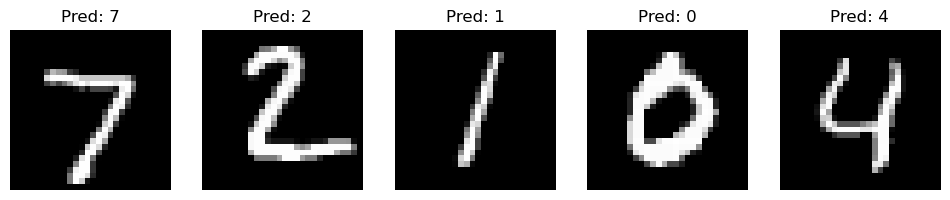

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load the MNIST dataset (using Keras)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 3: Preprocess the data
# Reshape the data to flatten the images into vectors
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the data to values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors (optional for neural network)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Split the data into training and validation sets (optional)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Step 5: Choose a model (Logistic Regression for simplicity)
# Train a logistic regression classifier
model = LogisticRegression(max_iter=100, solver='lbfgs')
model.fit(X_train, np.argmax(y_train, axis=1))  # Convert y_train back to a vector of labels

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(12, 5))
for i in range(5):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()
